In [1]:
import pandas as pd
df = pd.read_csv('train_s3TEQDk.csv')

In [2]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


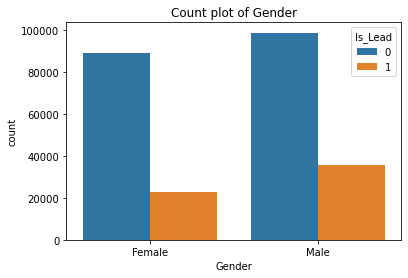

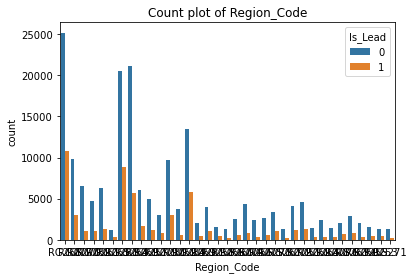

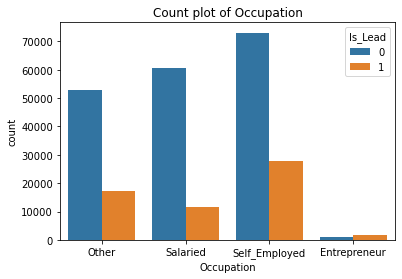

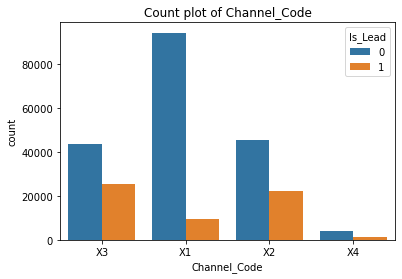

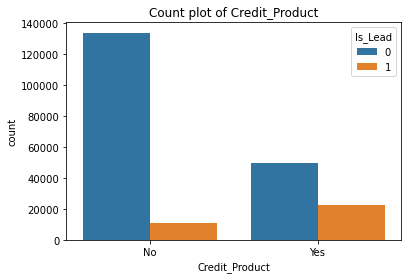

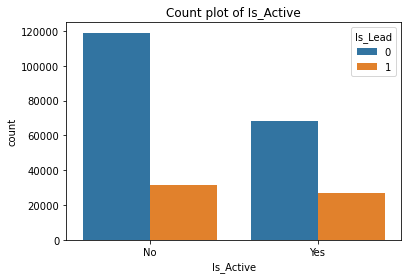

In [3]:
#Exploratory Data Analysis

import seaborn as sns
import matplotlib.pyplot as plt
data = df
categorical_col = ['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']
for i in categorical_col:
    sns.countplot(x=i, hue='Is_Lead', data=data)
    plt.title("Count plot of "+i)
    plt.show()

In [4]:
# Missing Value Treatment
df['Credit_Product'].fillna("No",inplace=True)

In [5]:
df.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [6]:
# Dropping ID Feature from dataset
df.drop('ID',axis=1,inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(245703, 10)

In [9]:
# Converting categorical variable into Dummy Variables
new_df = pd.get_dummies(df)

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245703 entries, 0 to 245724
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Age                       245703 non-null  int64
 1   Vintage                   245703 non-null  int64
 2   Avg_Account_Balance       245703 non-null  int64
 3   Is_Lead                   245703 non-null  int64
 4   Gender_Female             245703 non-null  uint8
 5   Gender_Male               245703 non-null  uint8
 6   Region_Code_RG250         245703 non-null  uint8
 7   Region_Code_RG251         245703 non-null  uint8
 8   Region_Code_RG252         245703 non-null  uint8
 9   Region_Code_RG253         245703 non-null  uint8
 10  Region_Code_RG254         245703 non-null  uint8
 11  Region_Code_RG255         245703 non-null  uint8
 12  Region_Code_RG256         245703 non-null  uint8
 13  Region_Code_RG257         245703 non-null  uint8
 14  Region_Code_RG258   

In [11]:
y=new_df["Is_Lead"]

In [12]:
x=new_df.drop('Is_Lead',axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from xgboost import XGBClassifier

In [40]:
xgb_model_1 = XGBClassifier(
    n_estimators=1000,
    verbosity=1,
    use_label_encoder=False,
    objective='binary:logistic',
    learning_rate=0.01,
    max_depth=6,
    base_score=0.5)

In [41]:
%%time
eval_set = [(X_train, y_train), (X_test, y_test)] 
xgb_model_1.fit(X_train, y_train, eval_set=eval_set,
                eval_metric='auc',
                verbose=True, early_stopping_rounds=100)

[0]	validation_0-auc:0.77462	validation_1-auc:0.77354
[1]	validation_0-auc:0.77461	validation_1-auc:0.77358
[2]	validation_0-auc:0.77460	validation_1-auc:0.77359
[3]	validation_0-auc:0.77460	validation_1-auc:0.77359
[4]	validation_0-auc:0.77460	validation_1-auc:0.77359
[5]	validation_0-auc:0.77487	validation_1-auc:0.77383
[6]	validation_0-auc:0.77480	validation_1-auc:0.77372
[7]	validation_0-auc:0.77487	validation_1-auc:0.77382
[8]	validation_0-auc:0.77541	validation_1-auc:0.77434
[9]	validation_0-auc:0.77498	validation_1-auc:0.77366
[10]	validation_0-auc:0.77511	validation_1-auc:0.77375
[11]	validation_0-auc:0.77552	validation_1-auc:0.77410
[12]	validation_0-auc:0.77569	validation_1-auc:0.77417
[13]	validation_0-auc:0.77539	validation_1-auc:0.77404
[14]	validation_0-auc:0.77591	validation_1-auc:0.77451
[15]	validation_0-auc:0.77567	validation_1-auc:0.77391
[16]	validation_0-auc:0.77552	validation_1-auc:0.77387
[17]	validation_0-auc:0.77552	validation_1-auc:0.77385
[18]	validation_0-au

[149]	validation_0-auc:0.78251	validation_1-auc:0.78028
[150]	validation_0-auc:0.78259	validation_1-auc:0.78032
[151]	validation_0-auc:0.78261	validation_1-auc:0.78034
[152]	validation_0-auc:0.78270	validation_1-auc:0.78041
[153]	validation_0-auc:0.78272	validation_1-auc:0.78047
[154]	validation_0-auc:0.78273	validation_1-auc:0.78045
[155]	validation_0-auc:0.78277	validation_1-auc:0.78050
[156]	validation_0-auc:0.78282	validation_1-auc:0.78055
[157]	validation_0-auc:0.78287	validation_1-auc:0.78059
[158]	validation_0-auc:0.78287	validation_1-auc:0.78058
[159]	validation_0-auc:0.78289	validation_1-auc:0.78059
[160]	validation_0-auc:0.78290	validation_1-auc:0.78059
[161]	validation_0-auc:0.78293	validation_1-auc:0.78059
[162]	validation_0-auc:0.78293	validation_1-auc:0.78057
[163]	validation_0-auc:0.78292	validation_1-auc:0.78055
[164]	validation_0-auc:0.78295	validation_1-auc:0.78057
[165]	validation_0-auc:0.78298	validation_1-auc:0.78060
[166]	validation_0-auc:0.78301	validation_1-auc:

[296]	validation_0-auc:0.78824	validation_1-auc:0.78495
[297]	validation_0-auc:0.78827	validation_1-auc:0.78497
[298]	validation_0-auc:0.78833	validation_1-auc:0.78500
[299]	validation_0-auc:0.78838	validation_1-auc:0.78506
[300]	validation_0-auc:0.78842	validation_1-auc:0.78509
[301]	validation_0-auc:0.78845	validation_1-auc:0.78512
[302]	validation_0-auc:0.78849	validation_1-auc:0.78516
[303]	validation_0-auc:0.78851	validation_1-auc:0.78518
[304]	validation_0-auc:0.78855	validation_1-auc:0.78522
[305]	validation_0-auc:0.78856	validation_1-auc:0.78523
[306]	validation_0-auc:0.78861	validation_1-auc:0.78526
[307]	validation_0-auc:0.78867	validation_1-auc:0.78529
[308]	validation_0-auc:0.78871	validation_1-auc:0.78533
[309]	validation_0-auc:0.78873	validation_1-auc:0.78535
[310]	validation_0-auc:0.78875	validation_1-auc:0.78536
[311]	validation_0-auc:0.78878	validation_1-auc:0.78540
[312]	validation_0-auc:0.78880	validation_1-auc:0.78541
[313]	validation_0-auc:0.78882	validation_1-auc:

[443]	validation_0-auc:0.79177	validation_1-auc:0.78712
[444]	validation_0-auc:0.79180	validation_1-auc:0.78713
[445]	validation_0-auc:0.79183	validation_1-auc:0.78715
[446]	validation_0-auc:0.79185	validation_1-auc:0.78715
[447]	validation_0-auc:0.79187	validation_1-auc:0.78716
[448]	validation_0-auc:0.79191	validation_1-auc:0.78721
[449]	validation_0-auc:0.79193	validation_1-auc:0.78722
[450]	validation_0-auc:0.79194	validation_1-auc:0.78722
[451]	validation_0-auc:0.79197	validation_1-auc:0.78722
[452]	validation_0-auc:0.79200	validation_1-auc:0.78724
[453]	validation_0-auc:0.79201	validation_1-auc:0.78724
[454]	validation_0-auc:0.79204	validation_1-auc:0.78724
[455]	validation_0-auc:0.79206	validation_1-auc:0.78726
[456]	validation_0-auc:0.79210	validation_1-auc:0.78730
[457]	validation_0-auc:0.79212	validation_1-auc:0.78730
[458]	validation_0-auc:0.79214	validation_1-auc:0.78730
[459]	validation_0-auc:0.79215	validation_1-auc:0.78730
[460]	validation_0-auc:0.79220	validation_1-auc:

[589]	validation_0-auc:0.79429	validation_1-auc:0.78766
[590]	validation_0-auc:0.79432	validation_1-auc:0.78766
[591]	validation_0-auc:0.79433	validation_1-auc:0.78766
[592]	validation_0-auc:0.79434	validation_1-auc:0.78766
[593]	validation_0-auc:0.79436	validation_1-auc:0.78767
[594]	validation_0-auc:0.79437	validation_1-auc:0.78766
[595]	validation_0-auc:0.79438	validation_1-auc:0.78766
[596]	validation_0-auc:0.79440	validation_1-auc:0.78766
[597]	validation_0-auc:0.79441	validation_1-auc:0.78767
[598]	validation_0-auc:0.79442	validation_1-auc:0.78767
[599]	validation_0-auc:0.79444	validation_1-auc:0.78766
[600]	validation_0-auc:0.79445	validation_1-auc:0.78766
[601]	validation_0-auc:0.79446	validation_1-auc:0.78767
[602]	validation_0-auc:0.79448	validation_1-auc:0.78767
[603]	validation_0-auc:0.79450	validation_1-auc:0.78767
[604]	validation_0-auc:0.79451	validation_1-auc:0.78768
[605]	validation_0-auc:0.79452	validation_1-auc:0.78767
[606]	validation_0-auc:0.79454	validation_1-auc:

[736]	validation_0-auc:0.79618	validation_1-auc:0.78788
[737]	validation_0-auc:0.79618	validation_1-auc:0.78788
[738]	validation_0-auc:0.79620	validation_1-auc:0.78788
[739]	validation_0-auc:0.79621	validation_1-auc:0.78790
[740]	validation_0-auc:0.79622	validation_1-auc:0.78790
[741]	validation_0-auc:0.79624	validation_1-auc:0.78791
[742]	validation_0-auc:0.79625	validation_1-auc:0.78791
[743]	validation_0-auc:0.79626	validation_1-auc:0.78790
[744]	validation_0-auc:0.79627	validation_1-auc:0.78790
[745]	validation_0-auc:0.79628	validation_1-auc:0.78790
[746]	validation_0-auc:0.79629	validation_1-auc:0.78790
[747]	validation_0-auc:0.79631	validation_1-auc:0.78791
[748]	validation_0-auc:0.79632	validation_1-auc:0.78791
[749]	validation_0-auc:0.79632	validation_1-auc:0.78791
[750]	validation_0-auc:0.79633	validation_1-auc:0.78791
[751]	validation_0-auc:0.79634	validation_1-auc:0.78790
[752]	validation_0-auc:0.79635	validation_1-auc:0.78790
[753]	validation_0-auc:0.79636	validation_1-auc:

[883]	validation_0-auc:0.79757	validation_1-auc:0.78796
[884]	validation_0-auc:0.79758	validation_1-auc:0.78796
[885]	validation_0-auc:0.79758	validation_1-auc:0.78796
[886]	validation_0-auc:0.79760	validation_1-auc:0.78797
[887]	validation_0-auc:0.79761	validation_1-auc:0.78796
[888]	validation_0-auc:0.79761	validation_1-auc:0.78796
[889]	validation_0-auc:0.79762	validation_1-auc:0.78796
[890]	validation_0-auc:0.79763	validation_1-auc:0.78796
[891]	validation_0-auc:0.79764	validation_1-auc:0.78796
[892]	validation_0-auc:0.79764	validation_1-auc:0.78797
[893]	validation_0-auc:0.79766	validation_1-auc:0.78796
[894]	validation_0-auc:0.79766	validation_1-auc:0.78797
[895]	validation_0-auc:0.79767	validation_1-auc:0.78797
[896]	validation_0-auc:0.79768	validation_1-auc:0.78797
[897]	validation_0-auc:0.79768	validation_1-auc:0.78797
[898]	validation_0-auc:0.79770	validation_1-auc:0.78797
[899]	validation_0-auc:0.79773	validation_1-auc:0.78798
[900]	validation_0-auc:0.79773	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

In [42]:
xgb_model_1.get_booster().attributes()

{'best_iteration': '992', 'best_ntree_limit': '993', 'best_score': '0.788066'}

In [45]:
from sklearn.metrics import roc_auc_score
val_set_pred_proba = xgb_model_1.predict_proba(X_test)[:,1]
roc_auc_score(y_test, val_set_pred_proba) 

0.788071906521195

In [46]:
# Data Pre-processing on test data
test_data = pd.read_csv('test_mSzZ8RL.csv')
test_data.drop(['ID'],axis=1,inplace=True)
test_data['Credit_Product'].fillna("No",inplace=True)
new_test_df = pd.get_dummies(test_data)
X_testing = new_test_df.to_numpy()
X_testing = sc.transform(X_testing)
pred_proba_xgb = xgb_model_1.predict(X_testing)

In [47]:
temp_df = pd.DataFrame(pred_proba_xgb)
submission = pd.read_csv('test_mSzZ8RL.csv')
final_submission = pd.concat([submission,temp_df],axis=1)
final_submission.rename(columns = {0:'Is_Lead'}, inplace = True)
final_submission.to_csv('final_submission.csv',columns=['ID','Is_Lead'],index=False)